## Description

## Sine Function Approximation Using Artificial Neural Networks (ANN)

### 📌 Project Overview
In this project, we built an Artificial Neural Network (ANN) to approximate the **sine function**. The goal was to train a neural network that takes an angle (in radians) as input and predicts its sine value accurately.

### 🛠 Steps We Followed:
1. **Dataset Creation**  
   - Generated input angles in degrees using both **uniformly spaced** (`np.arange()`) and **randomly sampled** (`np.random.uniform()`) datasets.  
   - Converted degrees to **radians** since `np.sin()` expects inputs in radians.  
   - Computed **sine values** as the ground truth.

2. **Data Preprocessing**  
   - **Normalized the input values** to range between `-1` and `1` for better model performance.  
   - **Split the dataset** into training and testing sets (80% train, 20% test).  

3. **Building the ANN Model**  
   - Used a **Sequential Neural Network** with:
     - **1 Input Layer**
     - **3 Hidden Layers** (each with `tanh` activation)
     - **1 Output Layer** (`linear` activation for regression)  
   - **Compiled the model** with:
     - `adam` optimizer  
     - `mean_squared_error` (MSE) loss function  

4. **Training the Model**  
   - Trained the ANN for **100 epochs** with a **batch size of 32**.  
   - Measured **training time** for performance tracking.  

5. **Evaluating Performance**  
   - Computed error metrics:  
     - **Mean Squared Error (MSE)** → `0.000553`  
     - **Mean Absolute Error (MAE)** → `0.020092`  
     - **Root Mean Squared Error (RMSE)** → `0.023524`  
   - Plotted **Actual vs. Predicted Sine Values** to visually assess model accuracy.  

### ✅ **Final Outcome**
- The model successfully learned to approximate the sine function **with high accuracy**.  
- The predicted sine values closely matched the actual sine curve.  
- The ANN model generalizes well, making it suitable for function approximation tasks.  

🔥 **This project demonstrated how deep learning can be used for function approximation, showing that ANNs can learn continuous mathematical functions with minimal error!** 🚀


<br><br><br>  <!-- Creates multiple empty lines -->

## Custom Function(s)

In [348]:
import matplotlib.pyplot as plt

def plot(X, y, pred):
    """
    Plots the actual sine values against the predicted sine values.

    Parameters:
    -----------
    X : array-like
        The input values (radians) used for prediction.
    y : array-like
        The actual sine values corresponding to X.
    pred : array-like
        The predicted sine values from the model.

    Returns:
    --------
    None
        Displays a plot comparing the actual vs. predicted sine values.
    
    Notes:
    ------
    - The actual sine values are plotted as a blue line.
    - The predicted values are shown as red scatter points.
    - The x-axis represents the input values (in radians).
    - The y-axis represents the sine values.

    Example:
    --------
    >>> plot(X_test, y_test, y_pred)
    """
    
    plt.figure(figsize=(8, 4))
    plt.plot(X, y, label='Actual Sine', color='blue')
    plt.scatter(X, pred, label='Predicted Sine', color='red', s=5)
    plt.title('Actual vs. Predicted Sine Values')
    plt.xlabel('Input (Radians)')
    plt.ylabel('Sine Value')
    plt.legend()
    plt.show()

---

## Importing Libraries

In [206]:
import numpy as np
import pandas as pd
import time

---

## Creating Dataset

### Uniformly spaced dataset

In [82]:
X_degrees_uniform = np.arange(0, 360, 0.1)
X_radians_uniform = np.radians(X_degrees_uniform)
y_uniform = np.sin(X_radians_uniform)

In [84]:
print("Uniform Sample (Degrees):", X_degrees_uniform[:10])

Uniform Sample (Degrees): [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


Number of elemnts: (stop - start) / step
(360 - 0) / 0.1 = 3600

In [52]:
X_radians_uniform.size

3600

In [116]:
y_uniform[:10]

array([0.        , 0.00174533, 0.00349065, 0.00523596, 0.00698126,
       0.00872654, 0.01047178, 0.012217  , 0.01396218, 0.01570732])

### Random dataset

In [56]:
X_degrees_random = np.random.uniform(0, 360, 5000)
X_radians_random = np.radians(X_degrees_random)
y_random = np.sin(X_radians_random)

In [58]:
print("Random Sample (Degrees):", X_degrees_random[:10])

Random Sample (Degrees): [146.08216413 346.2583107  353.21382752 259.09625779 344.68269291
 132.7256928  252.92081423 190.13196642 158.45019033 123.6712561 ]


In [60]:
X_radians_random.size

5000

In [66]:
X_radians_random[:10]

array([2.54961474, 6.04334758, 6.16474425, 4.52208278, 6.01584787,
       2.31650034, 4.41430096, 3.31842883, 2.76547752, 2.15847061])

In [74]:
y_random[:10]

array([ 0.55800346, -0.237545  , -0.11816433, -0.98194636, -0.2641644 ,
        0.73461042, -0.95589977, -0.17591597,  0.36730994,  0.83223237])

---

## Data Preprocessing: Splitting & Normalization

### Data Preprocessing: Splitting & Normalization

Before training our ANN model, we need to:
1. **Normalize the input values** to improve training efficiency.
2. **Split the dataset** into training and testing sets.

In [126]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [131]:
scaler = MinMaxScaler(feature_range=(-1, 1))

In [133]:
X_radians_uniform = scaler.fit_transform(X_radians_uniform.reshape(-1, 1)).flatten()
X_radians_random = scaler.fit_transform(X_radians_random.reshape(-1, 1)).flatten()

#### Normalize the entire dataset first

In [137]:
X_radians_uniform = scaler.fit_transform(X_radians_uniform.reshape(-1, 1)).flatten()
X_radians_random = scaler.fit_transform(X_radians_random.reshape(-1, 1)).flatten()

#### Split into training and testing sets

In [140]:
X_train_uniform, X_test_uniform, y_train_uniform, y_test_uniform = train_test_split(
    X_radians_uniform, y_uniform, test_size=0.2, random_state=42
)

X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(
    X_radians_random, y_random, test_size=0.2, random_state=42
)

---

## Define the ANN Model Architecture

In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [169]:
ann = Sequential()

#### Input + First Hidden Layer

In [194]:
ann.add(Dense(units=16, activation='tanh', input_shape=(1,)))

#### Additional Hidden Layers

In [198]:
ann.add(Dense(units=16, activation='tanh'))
ann.add(Dense(units=8, activation='tanh'))

#### Output Layer

In [187]:
ann.add(Dense(units=1, activation='linear'))  # Regression → No sigmoid here

#### Compile the Model

In [190]:
ann.compile(optimizer='adam', loss='mean_squared_error')

---

## Train the Model

### Uniform Dataset

In [208]:
# Start Timer
start_time = time.time()

# Train the model
history = ann.fit(X_train_uniform, y_train_uniform, batch_size=32, epochs=100, verbose=1)

# End Timer
end_time = time.time()

Epoch 1/100
90/90 [==============================] - 4s 8ms/step - loss: 0.5197
Epoch 2/100
90/90 [==============================] - 1s 8ms/step - loss: 0.5033
Epoch 3/100
90/90 [==============================] - 1s 9ms/step - loss: 0.5029
Epoch 4/100
90/90 [==============================] - 1s 8ms/step - loss: 0.5029
Epoch 5/100
90/90 [==============================] - 1s 8ms/step - loss: 0.5028
Epoch 6/100
90/90 [==============================] - 1s 8ms/step - loss: 0.5028
Epoch 7/100
90/90 [==============================] - 1s 8ms/step - loss: 0.5014
Epoch 8/100
90/90 [==============================] - 1s 8ms/step - loss: 0.2481
Epoch 9/100
90/90 [==============================] - 1s 8ms/step - loss: 0.0753
Epoch 10/100
90/90 [==============================] - 1s 8ms/step - loss: 0.0690
Epoch 11/100
90/90 [==============================] - 1s 8ms/step - loss: 0.0674
Epoch 12/100
90/90 [==============================] - 1s 8ms/step - loss: 0.0665
Epoch 13/100
90/90 [=================

#### Training Time

In [210]:
print(f"\nTotal Training Time: {end_time - start_time:.2f} seconds")


Total Training Time: 75.43 seconds


### Random Dataset

In [216]:
# Start Timer
start_time = time.time()

# Train the model
history = ann.fit(X_train_random, y_train_random, batch_size=32, epochs=100, verbose=1)

# End Timer
end_time = time.time()

Epoch 1/100
125/125 [==============================] - 1s 9ms/step - loss: 0.0624
Epoch 2/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0622
Epoch 3/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0622
Epoch 4/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0619
Epoch 5/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0618
Epoch 6/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0618
Epoch 7/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0617
Epoch 8/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0617
Epoch 9/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0619
Epoch 10/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0616
Epoch 11/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0615
Epoch 12/100
125/125 [==============================] - 1s 7ms/step - loss: 0.0616
Epoch 13/100


#### Training Time

In [219]:
print(f"\nTotal Training Time: {end_time - start_time:.2f} seconds")


Total Training Time: 98.91 seconds


---

## Evaluate the Model on Test Data and Make Predictions

In [312]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Uniform

In [226]:
test_loss_uniform = ann.evaluate(X_test_uniform, y_test_uniform)
print(f"Test Loss (MSE): {test_loss_uniform:.4f}")

23/23 [==============================] - 1s 5ms/step - loss: 5.3271e-04
Test Loss (MSE): 0.0005


In [238]:
y_pred_uniform = ann.predict(X_test_uniform)

23/23 [==============================] - 0s 4ms/step


In [320]:
y_pred_uniform_mean = y_pred_uniform.mean(axis=1)

In [322]:
comparison_df_uniform = pd.DataFrame({
    'X_test (radians)': X_test_uniform.flatten(),
    'Actual Sine': y_test_uniform.flatten(),
    'Predicted Sine': y_pred_uniform_mean.flatten()
})

In [326]:
comparison_df_uniform.head()

,X_test (radians),Actual Sine,Predicted Sine
0,-0.255349,0.719340,0.745890
1,-0.110308,0.340380,0.335607
2,0.972215,-0.088894,-0.110234
3,0.986663,-0.043619,-0.084808
4,-0.882745,0.359997,0.338436


In [330]:
mse_uniform = mean_squared_error(y_test_uniform, y_pred_uniform_mean)
mae_uniform = mean_absolute_error(y_test_uniform, y_pred_uniform_mean)
rmse_uniform = mse_uniform ** 0.5  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse_uniform:.6f}")
print(f"Mean Absolute Error (MAE): {mae_uniform:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_uniform:.6f}")

Mean Squared Error (MSE): 0.000532
Mean Absolute Error (MAE): 0.019518
Root Mean Squared Error (RMSE): 0.023062


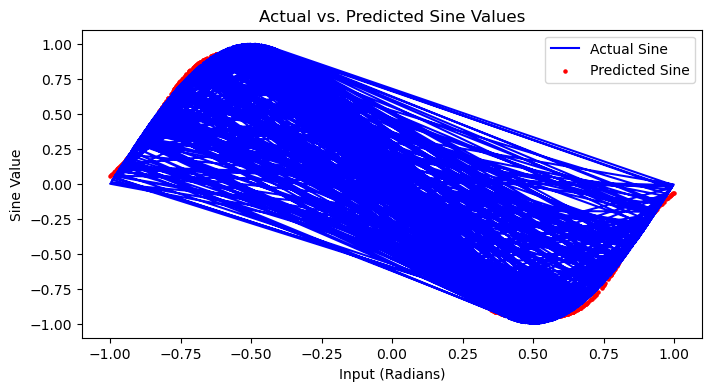

In [344]:
plot(X=X_test_uniform, y=y_test_uniform, pred=y_pred_uniform_mean)

### Random

In [246]:
test_loss_uniform = ann.evaluate(X_test_random, y_test_random)
print(f"Test Loss (MSE): {test_loss_uniform:.4f}")

32/32 [==============================] - 0s 6ms/step - loss: 5.5419e-04
Test Loss (MSE): 0.0006


In [257]:
y_pred_random = ann.predict(X_test_random)

32/32 [==============================] - 0s 5ms/step


In [298]:
y_pred_random_mean = y_pred_random.mean(axis=1)

In [308]:
comparison_df_random = pd.DataFrame({
    'X_test (radians)': X_test_random.flatten(),
    'Actual Sine': y_test_random.flatten(),
    'Predicted Sine': y_pred_random_mean.flatten()
})

In [328]:
comparison_df_random.head()

,X_test (radians),Actual Sine,Predicted Sine
0,-0.571661,0.974724,0.948232
1,-0.884455,0.355088,0.333590
2,0.804550,-0.577033,-0.560354
3,0.686252,-0.834189,-0.860980
4,0.472179,-0.996108,-0.957630


In [314]:
mse_random = mean_squared_error(y_test_random, y_pred_random_mean)
mae_random = mean_absolute_error(y_test_random, y_pred_random_mean)
rmse_random = mse_random ** 0.5  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse_random:.6f}")
print(f"Mean Absolute Error (MAE): {mae_random:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_random:.6f}")

Mean Squared Error (MSE): 0.000553
Mean Absolute Error (MAE): 0.020092
Root Mean Squared Error (RMSE): 0.023524


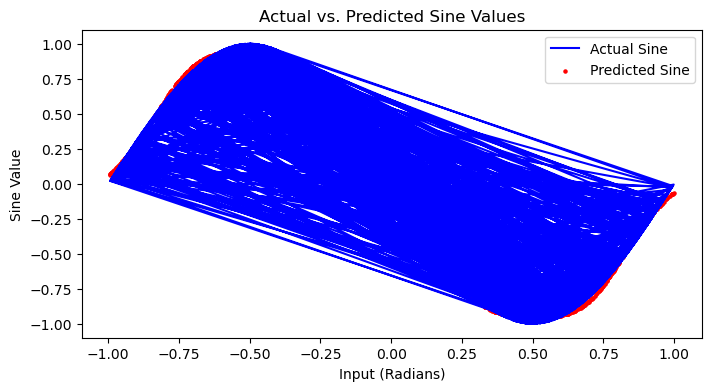

In [342]:
plot(X = X_test_random, y = y_test_random, pred = y_pred_random_mean)

<br><br><br>  <!-- Creates multiple empty lines -->

# The End 👨‍💻